# HR Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('../Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [6]:
data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [7]:
# checking numbers of unique value in each columns
uni = []
for col in data.columns:
    uni.append(len(np.unique(data[col])))
pd.DataFrame({"columns":data.columns,
             "Unique":uni})

,columns,Unique
0,Age,43
1,Attrition,2
2,BusinessTravel,3
3,DailyRate,886
4,Department,3
5,DistanceFromHome,29
6,Education,5
7,EducationField,6
8,EmployeeCount,1
9,EmployeeNumber,1470


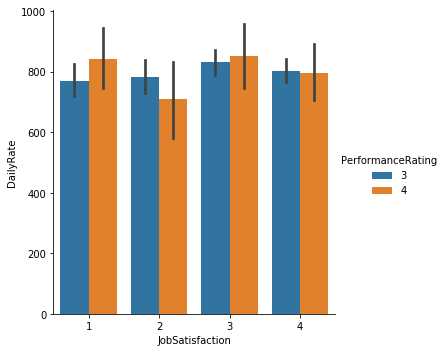

In [8]:
sns.catplot(x="JobSatisfaction", y="DailyRate", hue="PerformanceRating",kind="bar", data=data);

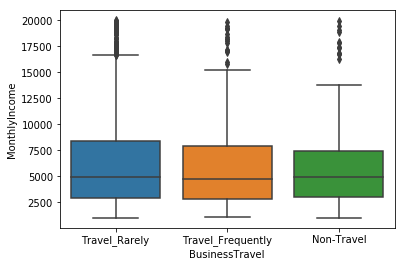

In [9]:
sns.boxplot( x="BusinessTravel",y="MonthlyIncome", data=data)

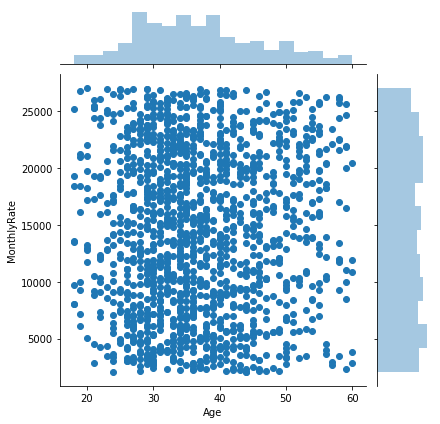

In [10]:
sns.jointplot(x="Age", y="MonthlyRate", data=data);

In [11]:
bins = np.arange(0, 1500, 100)

In [12]:
for x in ['EmployeeCount','Over18','StandardHours']:
    data.drop(columns= x,inplace= True)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [13]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<Figure size 864x864 with 0 Axes>

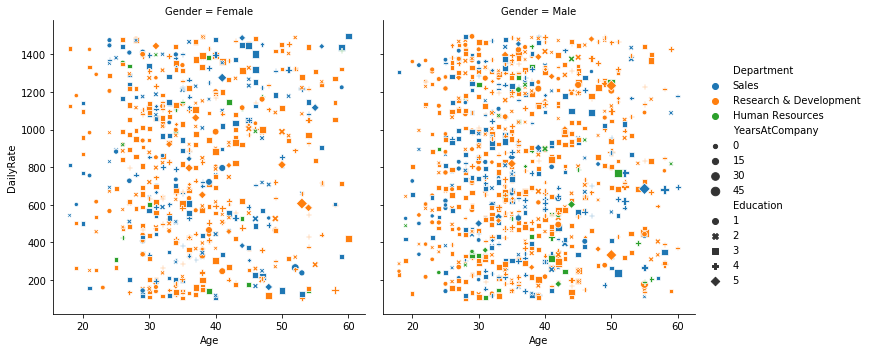

In [14]:
plt.figure(figsize=(12,12))
sns.relplot(x='Age',y='DailyRate',col = 'Gender',hue = 'Department',style= 'Education',size ='YearsAtCompany' ,data = data)
#col="time",hue="smoker", style="smoker", size="size",data=tips

In [15]:
str(data['OverTime'].dtype)

'object'

In [16]:
target = "Attrition"
feature_by_dtype = {}
for c in data.columns:
    
    if c == target: continue
    
    data_type = str(data[c].dtype)
    
    if data_type not in feature_by_dtype.keys():
         feature_by_dtype[data_type] = [c]
    else:
        feature_by_dtype[data_type].append(c)

feature_by_dtype
feature_by_dtype.keys()


dict_keys(['int64', 'object'])

In [17]:
feature_by_dtype

{'int64': ['Age',
  'DailyRate',
  'DistanceFromHome',
  'Education',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'HourlyRate',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'MonthlyRate',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',
  'RelationshipSatisfaction',
  'StockOptionLevel',
  'TotalWorkingYears',
  'TrainingTimesLastYear',
  'WorkLifeBalance',
  'YearsAtCompany',
  'YearsInCurrentRole',
  'YearsSinceLastPromotion',
  'YearsWithCurrManager'],
 'object': ['BusinessTravel',
  'Department',
  'EducationField',
  'Gender',
  'JobRole',
  'MaritalStatus',
  'OverTime']}

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le  = LabelEncoder()

In [20]:
for x in feature_by_dtype['object']:
    data[x] = le.fit_transform(data[x])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null int64
DailyRate                   1470 non-null int64
Department                  1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 

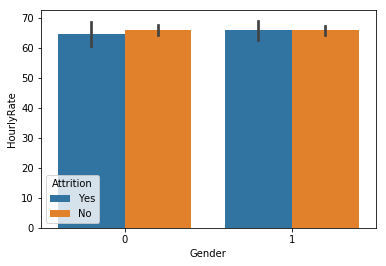

In [25]:
sns.barplot(x=data['Gender'],y=data['HourlyRate'],hue=data['Attrition'])

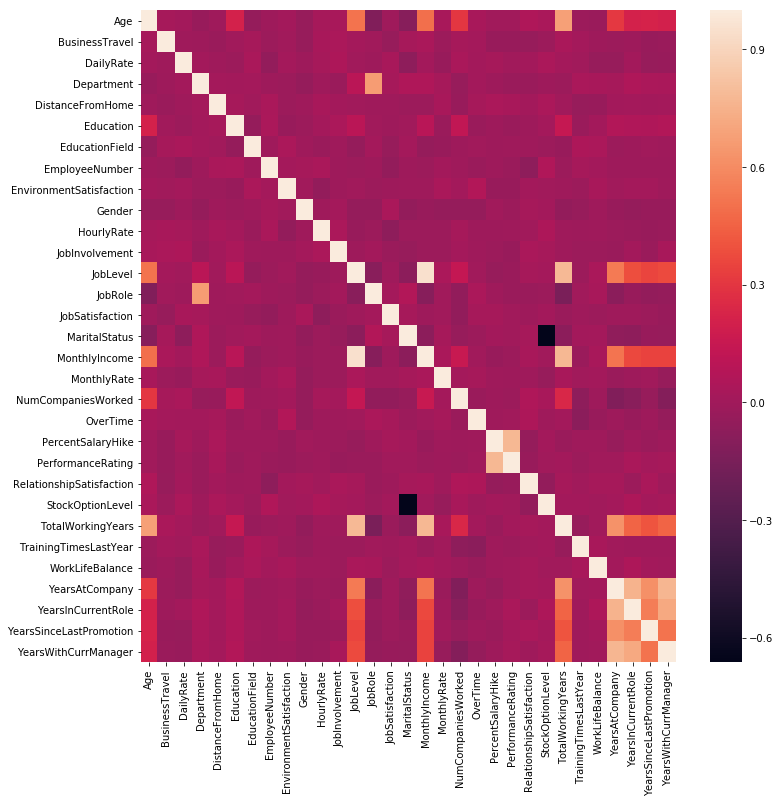

In [26]:
hr_corr = data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(hr_corr,annot=False)

In [22]:
X = data.drop(columns='Attrition')
y = data.iloc[:,1:2].values
y = y.reshape(-1,1)

In [23]:
X.shape,y.shape

((1470, 31), (1470, 1))

In [24]:
y = le.fit_transform(y)

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
sScaler = StandardScaler()

In [64]:
X = sScaler.fit_transform(X)

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA().fit(X)

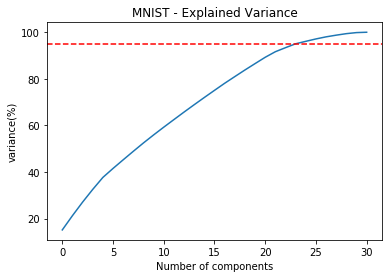

In [67]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of components')
plt.ylabel('variance(%)')
plt.title('MNIST - Explained Variance')
plt.axhline(y=95,color = 'r', linestyle = '--')
plt.show()

In [68]:
pca  = PCA(23).fit(X)
X_transformed = pca.transform(X)

In [69]:
X_transformed.shape

(1470, 23)

In [73]:
for x in range(101):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X_transformed, y, test_size=0.33, random_state=x,stratify=y)
    logReg= LogisticRegression()
    logReg.fit(Xtrain,ytrain)
    pre = logReg.predict(Xtest)
    if (accuracy_score(ytest,pre)>0.884):
        print(x)
        print(accuracy_score(ytest,pre))
        print(confusion_matrix(ytest,pre))
        print(classification_report(ytest,pre))

26
0.8868312757201646
[[403   5]
 [ 50  28]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94       408
           1       0.85      0.36      0.50        78

   micro avg       0.89      0.89      0.89       486
   macro avg       0.87      0.67      0.72       486
weighted avg       0.88      0.89      0.87       486

30
0.8847736625514403
[[395  13]
 [ 43  35]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       408
           1       0.73      0.45      0.56        78

   micro avg       0.88      0.88      0.88       486
   macro avg       0.82      0.71      0.74       486
weighted avg       0.87      0.88      0.87       486

35
0.8847736625514403
[[396  12]
 [ 44  34]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       408
           1       0.74      0.44      0.55        78

   micro avg       0.88      0.88      0.88    

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.33, random_state=52,stratify=y)

In [80]:
X_train.shape

(984, 23)

In [81]:
y_train.shape

(984,)

In [82]:
lr= LogisticRegression()

In [83]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
pred = lr.predict(X_test)

In [85]:
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8868312757201646
[[401   7]
 [ 48  30]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       408
           1       0.81      0.38      0.52        78

   micro avg       0.89      0.89      0.89       486
   macro avg       0.85      0.68      0.73       486
weighted avg       0.88      0.89      0.87       486



###  Decision Tree Classifier

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
parameters =[{'criterion':['gini'],'max_depth':[1,2,3,4],'random_state':[z for z in range(1,51)]}]

In [88]:
dtc = DecisionTreeClassifier()

In [89]:
gridSearchCV = GridSearchCV(estimator= dtc,
                           param_grid= parameters,
                           scoring='accuracy',
                           cv=40,
                           n_jobs=-1)

In [90]:
gridSearchCV = gridSearchCV.fit(X_train,y_train)

In [91]:
gridSearchCV.best_score_

0.8556910569105691

In [92]:
gridSearchCV.best_params_

{'criterion': 'gini', 'max_depth': 3, 'random_state': 9}

In [98]:
dt = DecisionTreeClassifier(random_state=9,max_depth=3,criterion='gini')
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
dt.score(X_train,y_train)*100

86.99186991869918

In [99]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[393  15]
 [ 62  16]]
84.15637860082305


In [100]:
dt.feature_importances_

array([0.39778953, 0.        , 0.        , 0.10828498, 0.        ,
       0.07281311, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.21353219, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10401785, 0.10356234, 0.        ])

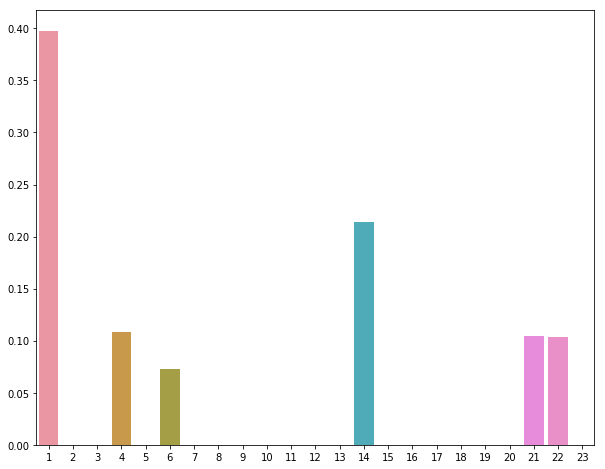

In [101]:
plt.figure(figsize=(10,8))
sns.barplot(y =dt.feature_importances_,x=[x for x in range(1,24)])

### Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rfc = RandomForestClassifier()

In [107]:
rf = RandomForestClassifier(random_state=10,n_estimators=41,criterion='gini',max_depth=2)

In [108]:
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)

In [109]:
#print confusion matrix and accuracy score
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print(rf_conf_matrix)
print(rf_acc_score*100)

[[408   0]
 [ 78   0]]
83.9506172839506


In [110]:
rf.feature_importances_

array([0.31558407, 0.02191781, 0.05813882, 0.06030584, 0.00985573,
       0.00676957, 0.04030864, 0.04050085, 0.03016526, 0.01428257,
       0.        , 0.01177205, 0.        , 0.07442844, 0.01801953,
       0.00448298, 0.02833666, 0.02326523, 0.03842363, 0.00508592,
       0.11470081, 0.04402319, 0.03963241])

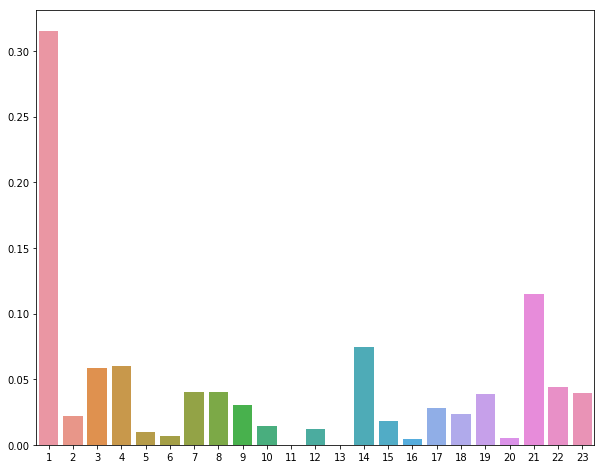

In [111]:
plt.figure(figsize=(10,8))
sns.barplot(y =rf.feature_importances_,x=[x for x in range(1,24)])